In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
from tueplots import axes, bundles, cycler, figsizes, fonts
from tueplots.constants.color import palettes
from PIL import Image

In [5]:
def set_style(nrows=1, ncols=1):
    plt.rcParams.update({"figure.dpi": 150})
    plt.rcParams.update(bundles.neurips2024(nrows=nrows, ncols=ncols, usetex=False))
    plt.rcParams.update(cycler.cycler(color=palettes.paultol_muted))
    plt.rcParams.update(axes.lines())
    plt.rcParams.update(axes.spines(top=False, right=False))

### Process raw data

In [6]:
path = '../data/Papilonidae_dataset/'

metadata = pd.read_csv(path+"/Papilonidae_metadata.txt", sep=",")
landmarks = pd.read_csv(path+"/Papilionidae_landmarks.txt", sep="\t", header=None)
aligned = pd.read_csv(path+"/Papilionidae_aligned.txt", sep="\t", header=None)
mean = pd.read_csv(path+"/average_butterfly.txt", sep="\t", header=None)

In [7]:
def convert_to_slice(df_subgroup):
    x_coords = df_subgroup[df_subgroup.iloc[:, 1] == "x-coordinates"].iloc[:, 2:].values
    y_coords = -df_subgroup[df_subgroup.iloc[:, 1] == "y-coordinates"].iloc[:, 2:].values
    return np.column_stack((x_coords.ravel(), y_coords.ravel()))

# Split dataframe by "Name" and convert each subgroup back to a 2D slice
groups = [group for _, group in aligned.groupby(aligned.iloc[:, 0])]
list_of_2d_slices = [convert_to_slice(group) for group in groups]
array3D_aligned = np.dstack(list_of_2d_slices)

In [8]:
array3D_aligned.shape

(1000, 2, 40)

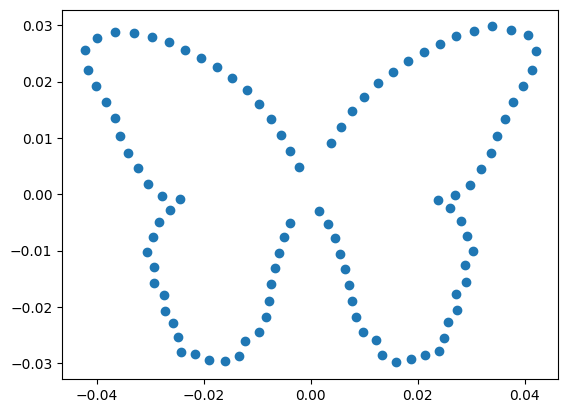

In [9]:
n = 0
plt.scatter(array3D_aligned[::10, 0, n], array3D_aligned[::10, 1, n])

In [10]:
aligned_subsampled = array3D_aligned[::10, :, :]
aligned_subsampled = np.swapaxes(aligned_subsampled, 0, 2)
aligned_subsampled = np.swapaxes(aligned_subsampled, 1, 2)
aligned_subsampled = aligned_subsampled * 12.5 + 0.5
print(aligned_subsampled.shape)

(40, 100, 2)


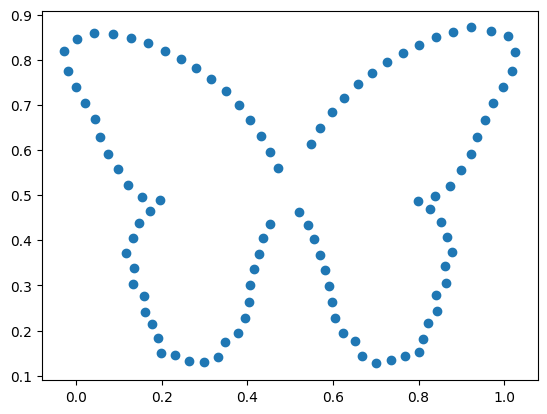

In [11]:
plt.scatter(aligned_subsampled[0, :, 0], aligned_subsampled[0, :, 1])

In [12]:
np.save(path+"/papilonidae_pts.npy", aligned_subsampled)

In [13]:
mean = np.loadtxt(path+"/average_butterfly.txt")
mean = np.swapaxes(mean, 0, 1)
mean_subsampled = mean[::10, :]
mean_subsampled[:, 1] = -mean_subsampled[:, 1]
mean_subsampled = mean_subsampled * 12.5 + 0.5
print(mean_subsampled.shape)

(100, 2)


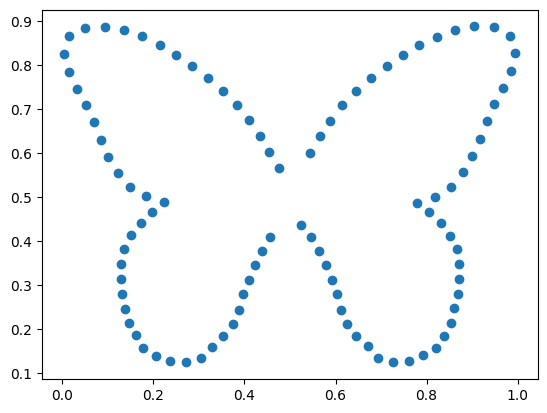

In [14]:
plt.scatter(mean_subsampled[:, 0], mean_subsampled[:, 1])

In [15]:
np.save(path+"/papilonidae_mean_pts.npy", mean_subsampled)

### Read selected species

In [16]:
papilonidae_pts = np.load('../data/papilonidae_pts.npy')
print(papilonidae_pts.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../data/papilonidae_pts.npy'

In [23]:
ambrax = papilonidae_pts[2]
deiphobus = papilonidae_pts[5]
protenor = papilonidae_pts[6]
phestus = papilonidae_pts[10]
polytes = papilonidae_pts[23]

ambrax_img = np.asarray(Image.open('../data/papilonidae_selected/pngs/ambrax.png'))
deiphobus_img = np.asarray(Image.open('../data/papilonidae_selected/pngs/deiphobus.png'))
protenor_img = np.asarray(Image.open('../data/papilonidae_selected/pngs/protenor.png'))
phestus_img = np.asarray(Image.open('../data/papilonidae_selected/pngs/phestus.png'))
polytes_img = np.asarray(Image.open('../data/papilonidae_selected/pngs/polytes.png'))

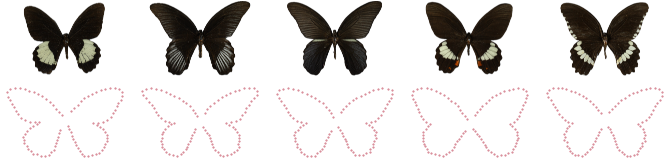

In [40]:
plt.rcParams.update(bundles.neurips2024(nrows=2, ncols=5, usetex=True))
plt.rcParams.update(cycler.cycler(color=palettes.paultol_muted))
plt.rcParams.update(axes.lines())
plt.rcParams.update(axes.spines(top=False, right=False))

fig, ax = plt.subplots(2, 5)
ax[0, 0].imshow(ambrax_img)
ax[0, 1].imshow(deiphobus_img)
ax[0, 2].imshow(protenor_img)
ax[0, 3].imshow(phestus_img)
ax[0, 4].imshow(polytes_img)

s = 0.2
ax[1, 0].scatter(ambrax[:, 0], ambrax[:, 1], s=s)
ax[1, 1].scatter(deiphobus[:, 0], deiphobus[:, 1], s=s)
ax[1, 2].scatter(protenor[:, 0], protenor[:, 1], s=s)
ax[1, 3].scatter(phestus[:, 0], phestus[:, 1], s=s)
ax[1, 4].scatter(polytes[:, 0], polytes[:, 1], s=s)

# set all axes off
for i in range(2):
    for j in range(5):
        ax[i, j].set_axis_off()

fig.savefig('../figures/papilonidae_selected.pdf', dpi=200, bbox_inches='tight', pad_inches=0)

### Visualize trajectories for different species

In [3]:
ambrax_traj = np.load('../data/papilonidae_traj/bwd_traj_ambrax.npy')[0]
deiphobus_traj = np.load('../data/papilonidae_traj/bwd_traj_deiphobus.npy')[0]
protenor_traj = np.load('../data/papilonidae_traj/bwd_traj_protenor.npy')[0]
phestus_traj = np.load('../data/papilonidae_traj/bwd_traj_phestus.npy')[0]
polytes_traj = np.load('../data/papilonidae_traj/bwd_traj_polytes.npy')[0]

In [41]:
set_style(column="full", nrows=1, ncols=5)

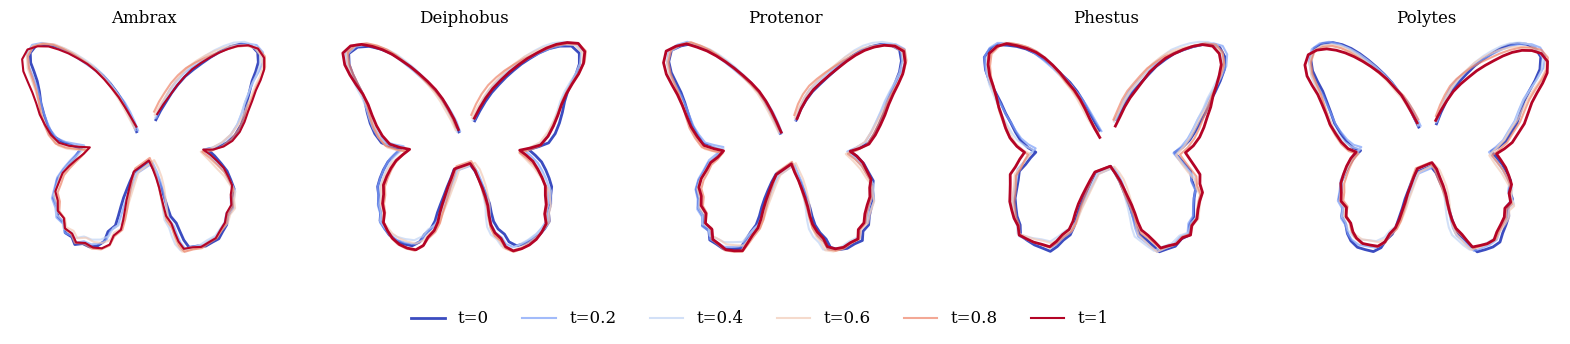

In [5]:
cmap = colormaps.get_cmap("coolwarm")
colors = cmap(np.linspace(0, 1, 6))
alpha = 0.7

fig, ax = plt.subplots(1, 5, figsize=(20, 3))
ax[0].plot(ambrax_traj[0, :, 0], ambrax_traj[0, :, 1], color=colors[0], label="t=0", linewidth=2)
ax[1].plot(deiphobus_traj[0, :, 0], deiphobus_traj[0, :, 1], color=colors[0], linewidth=2)
ax[2].plot(protenor_traj[0, :, 0], protenor_traj[0, :, 1], color=colors[0], linewidth=2)
ax[3].plot(phestus_traj[0, :, 0], phestus_traj[0, :, 1], color=colors[0], linewidth=2)
ax[4].plot(polytes_traj[0, :, 0], polytes_traj[0, :, 1], color=colors[0], linewidth=2)
for i in range(1, 5):
    ax[0].plot(ambrax_traj[i*10-1, :, 0], ambrax_traj[i*10-1, :, 1], color=colors[i], alpha=alpha, label=f"t={i*0.2:.1f}")
    ax[1].plot(deiphobus_traj[i*10-1, :, 0], deiphobus_traj[i*10-1, :, 1], color=colors[i], alpha=alpha)
    ax[2].plot(protenor_traj[i*10-1, :, 0], protenor_traj[i*10-1, :, 1], color=colors[i], alpha=alpha)
    ax[3].plot(phestus_traj[i*10-1, :, 0], phestus_traj[i*10-1, :, 1], color=colors[i], alpha=alpha)
    ax[4].plot(polytes_traj[i*10-1, :, 0], polytes_traj[i*10-1, :, 1], color=colors[i], alpha=alpha)
ax[0].plot(ambrax_traj[-1, :, 0], ambrax_traj[-1, :, 1], color=colors[-1], label="t=1")
ax[1].plot(deiphobus_traj[-1, :, 0], deiphobus_traj[-1, :, 1], color=colors[-1], linewidth=2)
ax[2].plot(protenor_traj[-1, :, 0], protenor_traj[-1, :, 1], color=colors[-1], linewidth=2)
ax[3].plot(phestus_traj[-1, :, 0], phestus_traj[-1, :, 1], color=colors[-1], linewidth=2)
ax[4].plot(polytes_traj[-1, :, 0], polytes_traj[-1, :, 1], color=colors[-1], linewidth=2)

ax[0].set_title("Ambrax", fontfamily='serif')
ax[1].set_title("Deiphobus", fontfamily='serif')
ax[2].set_title("Protenor", fontfamily='serif')
ax[3].set_title("Phestus", fontfamily='serif')
ax[4].set_title("Polytes", fontfamily='serif')

# add legend for the big plot
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), ncol=6, frameon=False, prop={'family': 'serif', 'size': 12})

for i in range(5):
    ax[i].set_axis_off()